In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
np.random.seed(42)

data = {
    "temperature": np.random.randint(15, 40, 200),
    "rain": np.random.choice([0, 1], 200),  # 0 = No rain, 1 = Rain
    "is_weekend": np.random.choice([0, 1], 200),
    "has_event": np.random.choice([0, 1], 200),
    "promotion": np.random.choice([0, 1], 200),
    "revenue": np.random.randint(3000, 20000, 200)
}

df = pd.DataFrame(data)
df.head()

,temperature,rain,is_weekend,has_event,promotion,revenue
0,21,1,1,1,1,7809
1,34,1,0,1,1,16456
2,29,1,1,1,0,18444
3,25,0,0,1,1,8997
4,22,1,1,0,0,5048


In [3]:
df.describe()

,temperature,rain,is_weekend,has_event,promotion,revenue
count,200.00000,200.00000,200.000000,200.000000,200.00000,200.000000
mean,26.59500,0.54500,0.520000,0.485000,0.45500,11740.610000
std,7.34922,0.49922,0.500854,0.501029,0.49922,4579.333762
min,15.00000,0.00000,0.000000,0.000000,0.00000,3009.000000
25%,21.00000,0.00000,0.000000,0.000000,0.00000,8085.500000
50%,26.00000,1.00000,1.000000,0.000000,0.00000,11539.500000
75%,33.00000,1.00000,1.000000,1.000000,1.00000,15786.000000
max,39.00000,1.00000,1.000000,1.000000,1.00000,19907.000000


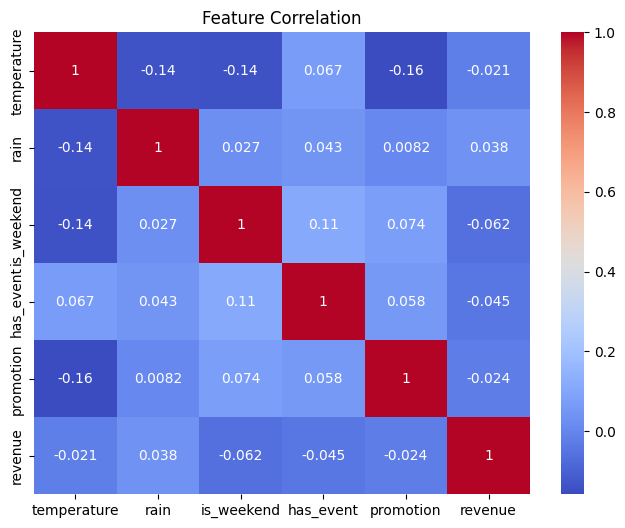

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [5]:
# Interaction features
df["temp_weekend"] = df["temperature"] * df["is_weekend"]
df["event_promo"] = df["has_event"] * df["promotion"]

# Weather impact
df["bad_weather"] = ((df["rain"] == 1) & (df["temperature"] < 20)).astype(int)

df.head()

,temperature,rain,is_weekend,has_event,promotion,revenue,temp_weekend,event_promo,bad_weather
0,21,1,1,1,1,7809,21,1,0
1,34,1,0,1,1,16456,0,1,0
2,29,1,1,1,0,18444,29,0,0
3,25,0,0,1,1,8997,0,1,0
4,22,1,1,0,0,5048,22,0,0


In [6]:
X = df.drop("revenue", axis=1)
y = df["revenue"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [9]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 4050.0487670266884
RMSE: 4638.949483315725
R2 Score: -0.14822621969938043


In [10]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [11]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE: 4225.167822619047
RMSE: 5025.35091223821
R2 Score: -0.34747575526110785


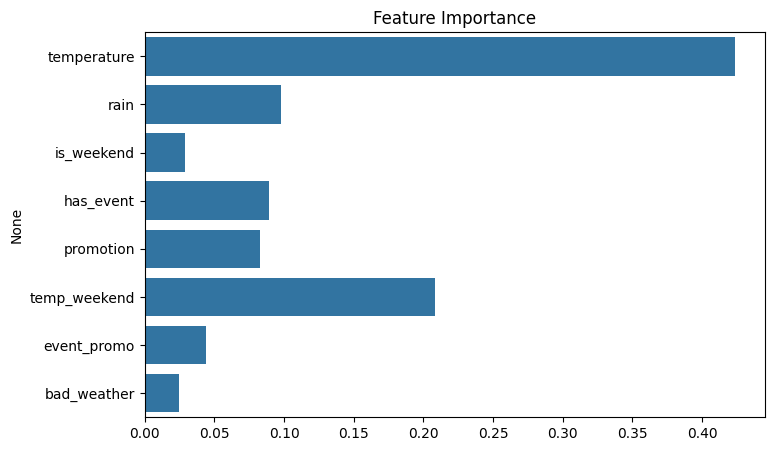

In [12]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [13]:
sample_input = pd.DataFrame([{
    "temperature": 32,
    "rain": 0,
    "is_weekend": 1,
    "has_event": 1,
    "promotion": 1,
    "temp_weekend": 32,
    "event_promo": 1,
    "bad_weather": 0
}])

predicted_revenue = rf_model.predict(sample_input)
print("Predicted Revenue:", int(predicted_revenue[0]))

Predicted Revenue: 10877
